In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
scenarios = pd.read_csv("scenarios.csv", sep=';', index_col='id')
# scenarios['CleaningOption'] = scenarios['CleaningOption'].where(scenarios['CleaningOption'] == 10000000, 'never')
scenarios['CleaningOption'] = scenarios['CleaningOption'].map({
    4: '4h',
    6: '6h',
    10000000: 'never'
})

scenarios['ContactRate'] = scenarios['ContactRate'].map({
    3: '3-per-hour',
    5: '5-per-hour',
    10: '10-per-hour'
})

scenarios['HandOption'] = np.where(scenarios['HandOption'] == 0, False, True)
scenarios

,MaskType,PeopleWithMask,SickAtT0,CleaningOption,HandOption,ContactRate
id,,,,,,
1,NO_MASK,5,1,4h,False,3-per-hour
2,NO_MASK,5,1,6h,False,3-per-hour
3,NO_MASK,5,1,never,False,3-per-hour
4,NO_MASK,5,1,4h,False,5-per-hour
5,NO_MASK,5,1,6h,False,5-per-hour
...,...,...,...,...,...,...
212,RESPIRATOR_MASK,5,6,6h,True,5-per-hour
213,RESPIRATOR_MASK,5,6,never,True,5-per-hour
214,RESPIRATOR_MASK,5,6,4h,True,10-per-hour


In [3]:
df = pd.read_csv("spread overtime.csv", sep=';')
df = df.iloc[: , :432]
df.rename(columns={name: name.split(".")[0] for name in df.columns}, inplace=True)
df.to_csv("Simulation Outputs.csv", sep=';')
df = pd.read_csv("Simulation Outputs.csv", header=[0, 1], sep=';')
df = df.set_index(('Unnamed: 0_level_0', 'hour'))
df.index.name = 'Hour'
infected = df[df.columns[::2]]
infected.columns = list(zip(*infected.columns))[0]
infected.index = infected.index / 24
infected.index.name = 'Day'
infected

C:\Users\mohamed.abourraja\AppData\Local\Temp\ipykernel_21188\3882565690.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

,1,2,3,4,5,6,7,8,9,10,...,207,208,209,210,211,212,213,214,215,216
Day,,,,,,,,,,,,,,,,,,,,,
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91.833333,1.0,2.0,1.0,3.0,1.0,3.0,1.0,2.0,3.0,1.0,...,2.0,2.0,3.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0
91.875000,1.0,2.0,1.0,3.0,1.0,3.0,1.0,2.0,3.0,1.0,...,2.0,2.0,3.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0
91.916667,1.0,3.0,1.0,3.0,1.0,3.0,1.0,2.0,4.0,1.0,...,2.0,2.0,3.0,2.0,4.0,1.0,6.0,5.0,5.0,6.0


In [4]:
masktypes = scenarios['MaskType'].unique()
cleaning = scenarios['CleaningOption'].unique()
hand = scenarios['HandOption'].unique()
conactrate = scenarios['ContactRate'].unique()
sickAtT0 = scenarios['SickAtT0'].unique()
scenarios

,MaskType,PeopleWithMask,SickAtT0,CleaningOption,HandOption,ContactRate
id,,,,,,
1,NO_MASK,5,1,4h,False,3-per-hour
2,NO_MASK,5,1,6h,False,3-per-hour
3,NO_MASK,5,1,never,False,3-per-hour
4,NO_MASK,5,1,4h,False,5-per-hour
5,NO_MASK,5,1,6h,False,5-per-hour
...,...,...,...,...,...,...
212,RESPIRATOR_MASK,5,6,6h,True,5-per-hour
213,RESPIRATOR_MASK,5,6,never,True,5-per-hour
214,RESPIRATOR_MASK,5,6,4h,True,10-per-hour


In [8]:
colors = {
    "NO_MASK": ["mistyrose", "lightcoral", "indianred", "salmon", "firebrick", "darkred"],
    "CLOTH_MASK": ["honeydew", "lightgreen", "mediumseagreen", "limegreen", "forestgreen", "darkgreen"],
    "SURGICAL_MASK": ["peachpuff", "moccasin", "sandybrown", "darkorange", "orange", "orangered"],
    "RESPIRATOR_MASK": ["lightblue", "lightskyblue", "deepskyblue", "dodgerblue", "royalblue", "navy"]
}

Text(0.5, 1.0, '# of Infections Over Time')

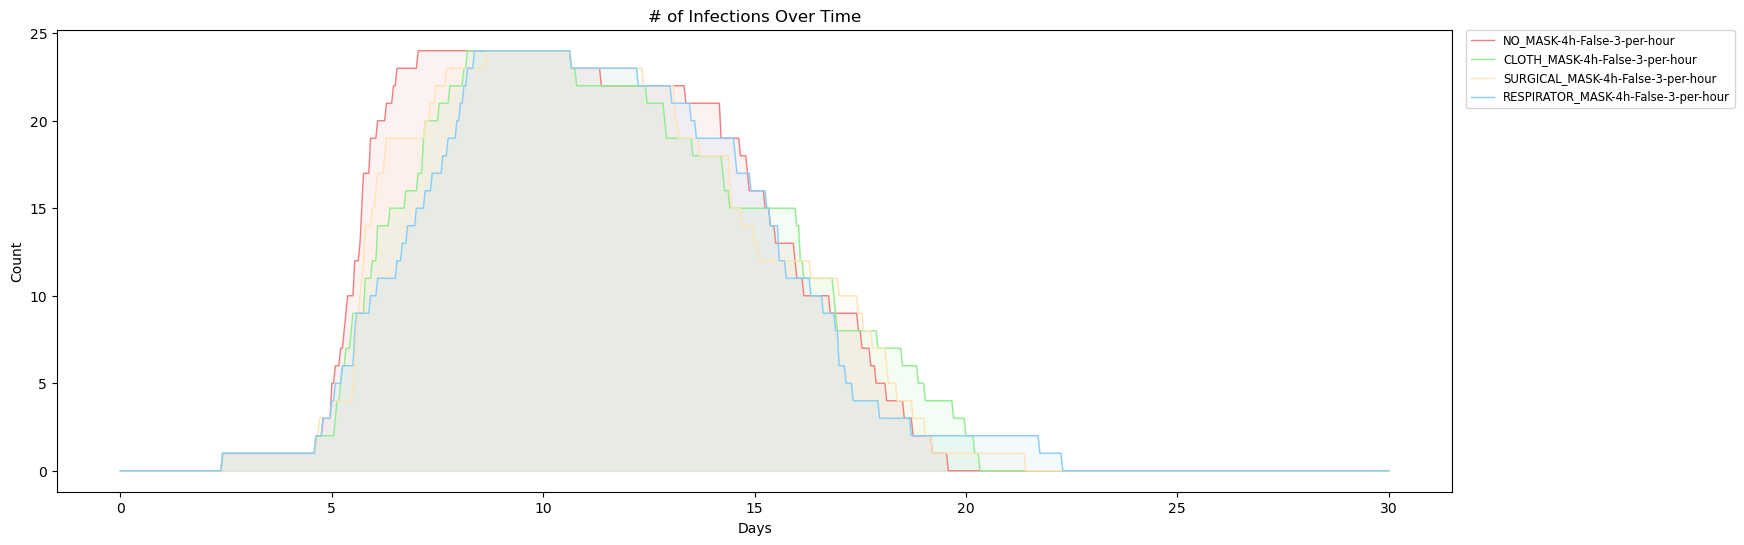

In [40]:
plt.figure(figsize=(18, 6)) 

for m in masktypes:
    for c in cleaning[:1]:
        for h in hand[:1]:
            for r in conactrate[:1]:
                for s in sickAtT0[:1]:
                    mask = (scenarios['MaskType'] == m) & (scenarios['CleaningOption'] == c) & \
                    (scenarios['HandOption'] == h) & (scenarios['SickAtT0'] == s) & ((scenarios['ContactRate'] == r))
                    col = str(scenarios[mask].index[0])
                    plt.plot(infected.index[:721], infected.loc[infected.index[:721], col], 
                             lw='1',
                             c=colors[m][1],
                             label=f'{m}-{c}-{h}-{r}')
                    
                    plt.fill_between(infected.index[:721], infected.loc[infected.index[:721], col], 
                                     color=colors[m][1], alpha=0.10)

plt.legend(
    bbox_to_anchor=(1.01, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize='small'
)

plt.xlabel('Days')
plt.ylabel('Count')
plt.title('# of Infections Over Time')

Text(0.5, 1.0, 'Impact of Mask and Device Cleaning Policies on Infection Spread (Average Infected Workers)')

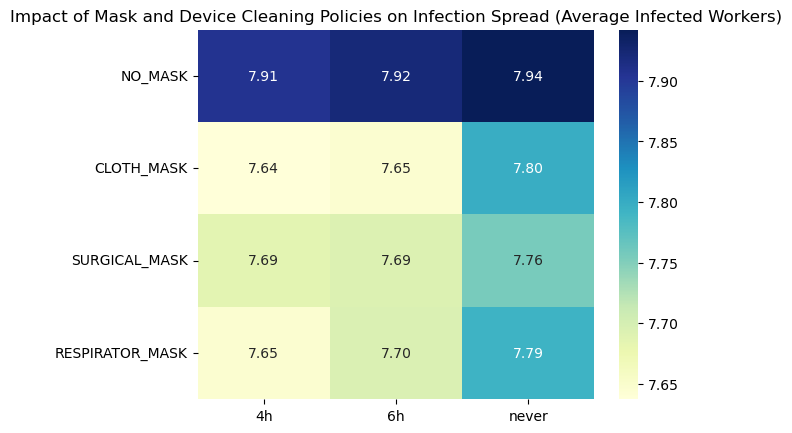

In [31]:
values = []
for m in masktypes:
    v = []
    for c in cleaning:
        mask = (scenarios['MaskType'] == m) & (scenarios['CleaningOption'] == c)
        cols = list(map(str, scenarios[mask].index))
        v.append(infected[cols].mean().mean())
    values.append(v)
    
df = pd.DataFrame(data=values, index=masktypes, columns=cleaning)
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Impact of Mask and Device Cleaning Policies on Infection Spread (Average Infected Workers)')

Text(0.5, 1.0, 'Impact of Mask and Hand Cleaning Policies on Infection Spread (Average Infected Workers)')

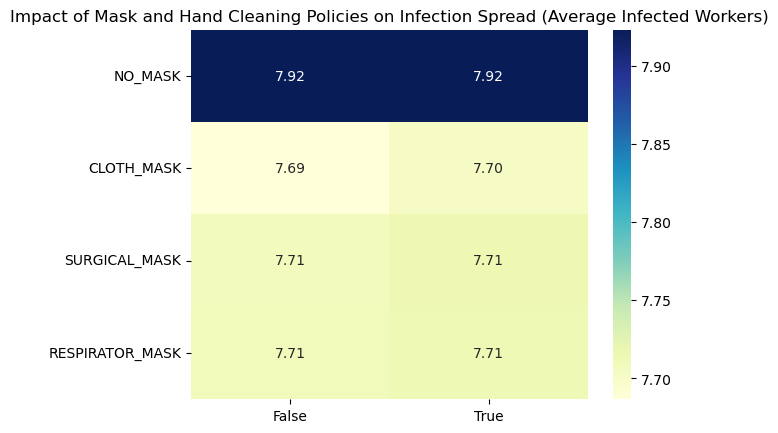

In [33]:
values = []
for m in masktypes:
    v = []
    for h in hand:
        mask = (scenarios['MaskType'] == m) & (scenarios['HandOption'] == h)
        cols = list(map(str, scenarios[mask].index))
        v.append(infected[cols].mean().mean())
    values.append(v)
    
df = pd.DataFrame(data=values, index=masktypes, columns=hand)
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Impact of Mask and Hand Cleaning Policies on Infection Spread (Average Infected Workers)')

Text(0.5, 1.0, 'Impact of Device and Hand Cleaning Policies on Infection Spread (Average Infected Workers)')

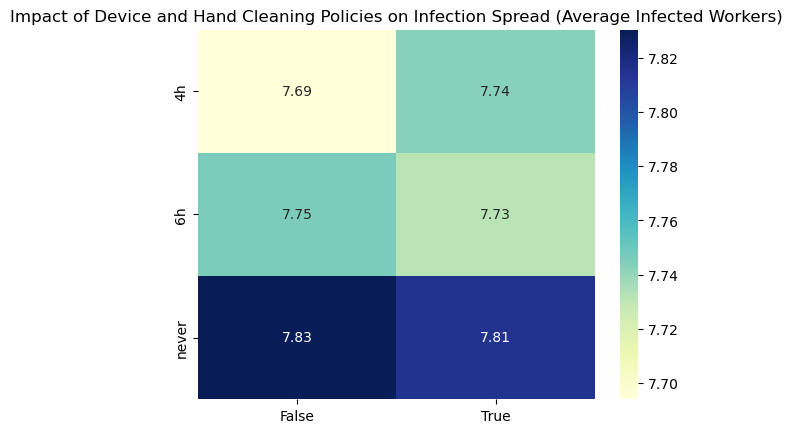

In [34]:
values = []
for c in cleaning:
    v = []
    for h in hand:
        mask = (scenarios['CleaningOption'] == c) & (scenarios['HandOption'] == h)
        cols = list(map(str, scenarios[mask].index))
        v.append(infected[cols].mean().mean())
    values.append(v)
    
df = pd.DataFrame(data=values, index=cleaning, columns=hand)
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Impact of Device and Hand Cleaning Policies on Infection Spread (Average Infected Workers)')

In [36]:
df = pd.read_csv("spread overtime.csv", sep=';')
df = df.iloc[: , :432]
df.rename(columns={name: name.split(".")[0] for name in df.columns}, inplace=True)
df.to_csv("Simulation Outputs.csv", sep=';')
df = pd.read_csv("Simulation Outputs.csv", header=[0, 1], sep=';')
df = df.set_index(('Unnamed: 0_level_0', 'hour'))
df.index.name = 'Hour'
contaminated = df[df.columns[1::2]]
contaminated.columns = list(zip(*contaminated.columns))[0]
contaminated.index = infected.index / 24
contaminated.index.name = 'Day'
contaminated

C:\Users\mohamed.abourraja\AppData\Local\Temp\ipykernel_21188\803933495.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

,1,2,3,4,5,6,7,8,9,10,...,207,208,209,210,211,212,213,214,215,216
Day,,,,,,,,,,,,,,,,,,,,,
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.001736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.003472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.005208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.006944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.826389,0.0,0.0,9.0,2.0,1.0,9.0,2.0,6.0,9.0,0.0,...,9.0,2.0,4.0,9.0,4.0,0.0,9.0,4.0,4.0,9.0
3.828125,0.0,0.0,9.0,1.0,1.0,9.0,1.0,6.0,9.0,0.0,...,9.0,3.0,4.0,9.0,5.0,1.0,9.0,4.0,5.0,9.0
3.829861,0.0,0.0,9.0,1.0,1.0,9.0,1.0,3.0,9.0,0.0,...,9.0,2.0,3.0,9.0,4.0,1.0,9.0,5.0,6.0,9.0
